<a href="https://colab.research.google.com/github/Pinlinzz/Analisis-Dataset-Employee-Salary-Analysis-/blob/main/Analisis_Dataset_Employee_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INISIASI DAN IMPORTING DATASET


In [ ]:
salary_df <- read.csv('/content/dataset/Salary_Dataset.csv')

summary(salary_df)

  Employee_ID         Name                Age           Gender         
 Min.   :   1.0   Length:1200        Min.   :20.00   Length:1200       
 1st Qu.: 300.8   Class :character   1st Qu.:30.00   Class :character  
 Median : 600.5   Mode  :character   Median :41.00   Mode  :character  
 Mean   : 600.5                      Mean   :39.99                     
 3rd Qu.: 900.2                      3rd Qu.:50.00                     
 Max.   :1200.0                      Max.   :59.00                     
   Country              City            Education          Job_Title        
 Length:1200        Length:1200        Length:1200        Length:1200       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

In [ ]:
salary_df <- read.csv('/content/dataset/Salary_Dataset.csv')

# Instal library yang bakal dipakai
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(dplyr)) install.packages("dplyr")
if(!require(ggcorrplot)) install.packages("ggcorrplot")
if(!require(moments)) install.packages("moments")
if(!require(car)) install.packages("car")

# Load library
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(moments)
library(car)


# Data Cleaning Singkat (pastiin tipe data uda benar)
salary_df$Gender <- as.factor(salary_df$Gender)
salary_df$Education <- factor(salary_df$Education, levels = c("High School", "Bachelor", "Master", "PhD"))
salary_df$Country <- as.factor(salary_df$Country)
salary_df$Department <- as.factor(salary_df$Department)

# Cek struktur data
str(salary_df)

'data.frame':	1200 obs. of  17 variables:
 $ Employee_ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name               : chr  "Employee_1" "Employee_2" "Employee_3" "Employee_4" ...
 $ Age                : int  58 48 34 27 40 58 38 42 30 30 ...
 $ Gender             : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 1 2 1 1 2 ...
 $ Country            : Factor w/ 5 levels "Canada","India",..: 2 4 5 4 1 2 4 5 4 3 ...
 $ City               : chr  "NY" "NY" "London" "Karachi" ...
 $ Education          : Factor w/ 4 levels "High School",..: 2 1 1 2 3 4 4 1 3 2 ...
 $ Job_Title          : chr  "Manager" "Designer" "Manager" "Developer" ...
 $ Department         : Factor w/ 4 levels "Finance","HR",..: 3 2 3 4 3 4 3 2 3 2 ...
 $ Experience_Years   : int  0 4 1 19 2 18 17 28 21 17 ...
 $ Salary_USD         : int  130735 54363 76694 31582 109910 96844 51301 104329 31620 92224 ...
 $ Bonus_USD          : int  3650 14600 15317 19768 18193 16563 7895 18543 2531 6481 ...
 $ Work_Hours_Per_Week: int  41

## Central Tendencies (Mean, Median, Mode)

Tendensi sentral adalah statistik deskriptif yang menggambarkan 'pusat' dari suatu set data. Ini memberikan gambaran tentang nilai tipikal atau rata-rata dalam distribusi data:

*   **Mean (Rata-rata)**: Jumlah semua nilai dibagi dengan jumlah observasi. Sensitif terhadap outlier.
*   **Median (Nilai Tengah)**: Nilai tengah dalam set data yang diurutkan. Tidak sensitif terhadap outlier.
*   **Mode (Nilai Paling Sering Muncul)**: Nilai yang paling sering muncul dalam set data. Berguna untuk data kategorikal atau diskrit.

Berikut adalah perhitungan untuk beberapa kolom numerik penting:

In [ ]:
# Fungsi untuk menghitung mode (sudah didefinisikan sebelumnya, tapi didefinisikan ulang untuk kejelasan)
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Kolom numerik yang ingin dianalisis tendensi sentralnya
numerical_cols <- c("Salary_USD", "Age", "Experience_Years", "Bonus_USD", "Work_Hours_Per_Week", "Performance_Score")

cat("=== Analisis Tendensi Sentral ===\n\n")

for (col in numerical_cols) {
  cat(paste0("--- Kolom: ", col, " ---\n"))
  cat(paste0("  Mean  : ", round(mean(salary_df[[col]], na.rm = TRUE), 2), "\n"))
  cat(paste0("  Median: ", round(median(salary_df[[col]], na.rm = TRUE), 2), "\n"))
  cat(paste0("  Mode  : ", round(get_mode(salary_df[[col]]), 2), "\n"))

  cat("\n")
}

=== Analisis Tendensi Sentral ===

--- Kolom: Salary_USD ---
  Mean  : 89792.31
  Median: 89086
  Mode  : 66901

--- Kolom: Age ---
  Mean  : 39.99
  Median: 41
  Mode  : 45

--- Kolom: Experience_Years ---
  Mean  : 14.35
  Median: 15
  Mode  : 12

--- Kolom: Bonus_USD ---
  Mean  : 10414.78
  Median: 10717.5
  Mode  : 16184

--- Kolom: Work_Hours_Per_Week ---
  Mean  : 44.36
  Median: 45
  Mode  : 58

--- Kolom: Performance_Score ---
  Mean  : 4.96
  Median: 5
  Mode  : 6



## Uji Normalitas Data (Shapiro-Wilk Test)

Uji normalitas digunakan untuk menentukan apakah sampel data berasal dari populasi yang berdistribusi normal. Ini penting karena banyak uji statistik inferensial (seperti t-test atau ANOVA) mengasumsikan normalitas data. Jika p-value dari uji Shapiro-Wilk kurang dari 0.05, kita menolak hipotesis nol (H0) bahwa data berdistribusi normal, yang berarti data kita tidak normal.

In [ ]:
# --- Normality Test (Shapiro-Wilk Test) ---

# Shapiro-Wilk test sensitif terhadap ukuran sampel. Untuk sampel yang sangat besar,
# bahkan sedikit penyimpangan dari normalitas dapat menghasilkan p-value yang signifikan.
# Jika data terlalu besar (misal > 5000), kita bisa ambil sampel acak.

# Fungsi untuk melakukan Shapiro-Wilk test, dengan sampling jika diperlukan
do_shapiro_test <- function(data_vec, col_name, sample_size = 5000) {
  # Pastikan kolom yang diuji tidak mengandung nilai NA
  data_vec <- na.omit(data_vec)

  if (length(data_vec) > sample_size) {
    cat(paste0("\n--- Peringatan: Kolom '", col_name, "' memiliki lebih dari ", sample_size, " observasi. Mengambil sampel acak ", sample_size, " data untuk Shapiro-Wilk Test. ---\n"))
    sampled_data <- sample(data_vec, sample_size)
    test_result <- shapiro.test(sampled_data)
  } else {
    test_result <- shapiro.test(data_vec)
  }
  cat(paste0("Shapiro-Wilk Test untuk '", col_name, "':\n"))
  print(test_result)
  if (test_result$p.value < 0.05) {
    cat(paste0("  Kesimpulan: Data '", col_name, "' **TIDAK** berdistribusi normal (p < 0.05).\n"))
  } else {
    cat(paste0("  Kesimpulan: Data '", col_name, "' berdistribusi normal (p >= 0.05).\n"))
  }
}

# Uji normalitas untuk 'Salary_USD'
do_shapiro_test(salary_df$Salary_USD, "Salary_USD")

# Uji normalitas untuk 'Experience_Years'
do_shapiro_test(salary_df$Experience_Years, "Experience_Years")

Shapiro-Wilk Test untuk 'Salary_USD':

	Shapiro-Wilk normality test

data:  data_vec
W = 0.94903, p-value < 2.2e-16

  Kesimpulan: Data 'Salary_USD' **TIDAK** berdistribusi normal (p < 0.05).
Shapiro-Wilk Test untuk 'Experience_Years':

	Shapiro-Wilk normality test

data:  data_vec
W = 0.94901, p-value < 2.2e-16

  Kesimpulan: Data 'Experience_Years' **TIDAK** berdistribusi normal (p < 0.05).


## Visualisasi Normalitas Data (Q-Q Plot)

Selain uji statistik seperti Shapiro-Wilk, visualisasi adalah cara yang baik untuk memeriksa normalitas data. **Q-Q Plot (Quantile-Quantile Plot)** membandingkan kuantil data Anda dengan kuantil dari distribusi normal. Jika titik-titik data terletak mendekati garis lurus 45 derajat, maka data dianggap berdistribusi normal.

Berikut adalah Q-Q Plot untuk 'Salary_USD' dan 'Experience_Years':

[1] 1034  682

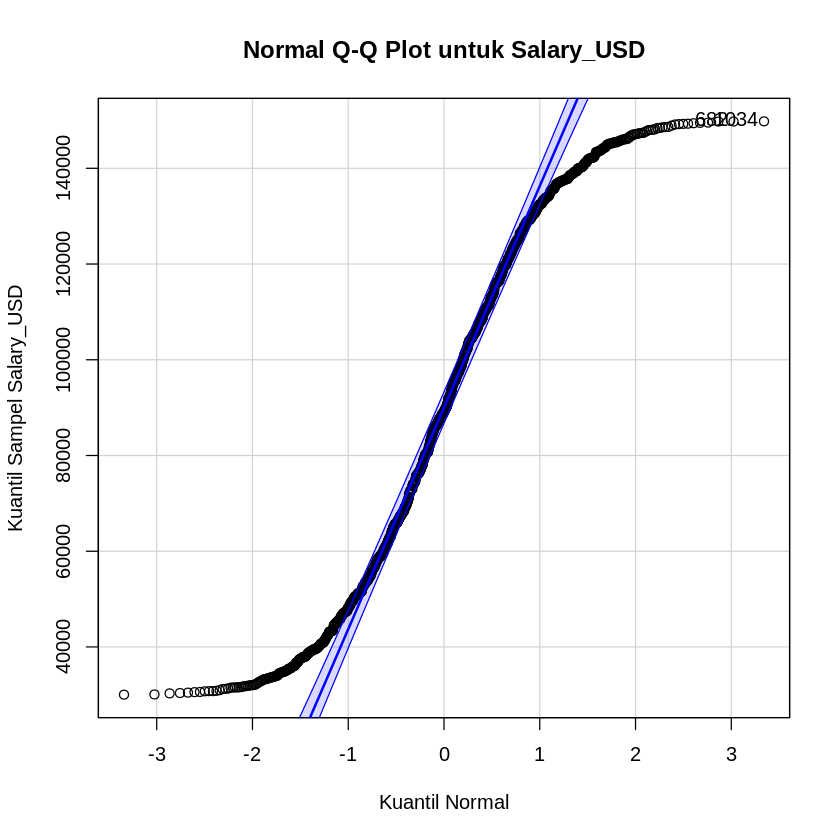

[1] 12 16

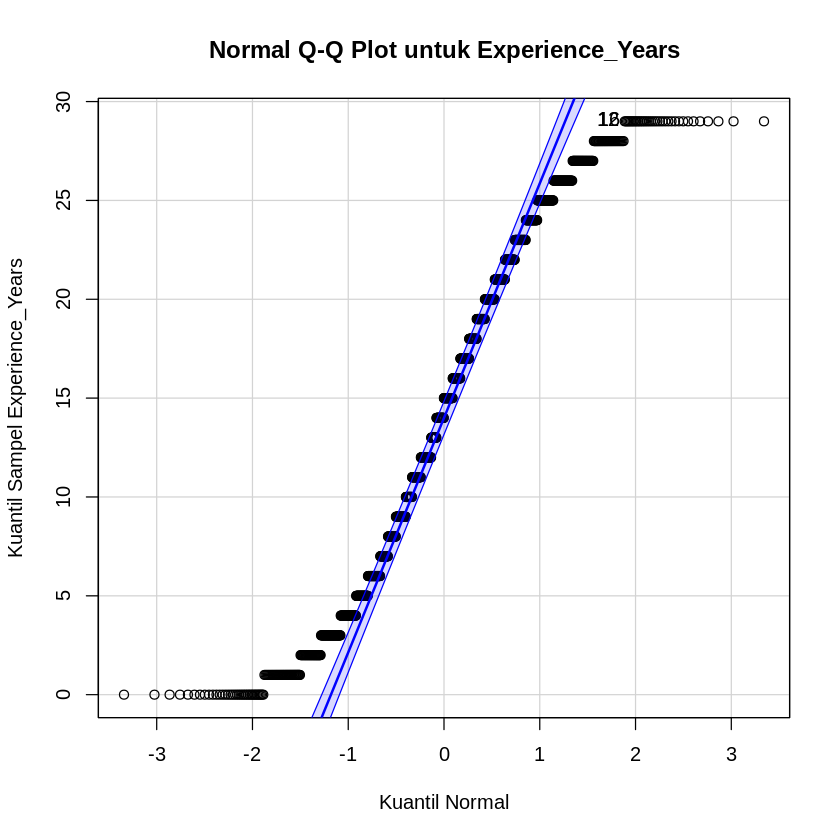

In [ ]:
# Load library yang dibutuhkan untuk Q-Q plot
if(!require(car)) install.packages("car")
library(car)

# Fungsi untuk membuat Q-Q plot
create_qq_plot <- function(data_vec, col_name) {
  # Pastikan kolom yang diuji tidak mengandung nilai NA
  data_vec <- na.omit(data_vec)

  qqPlot(data_vec,
         main = paste0("Normal Q-Q Plot untuk ", col_name),
         ylab = paste0("Kuantil Sampel ", col_name),
         xlab = "Kuantil Normal")
}

# Membuat Q-Q plot untuk 'Salary_USD'
create_qq_plot(salary_df$Salary_USD, "Salary_USD")

# Membuat Q-Q plot untuk 'Experience_Years'
create_qq_plot(salary_df$Experience_Years, "Experience_Years")

## Data Cleaning & Preprocessing


In [ ]:
# --- 1. Data Cleaning & Preprocessing ---

# buat hitung Modus (nilai yang paling sering muncul)
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Mengecek jumlah missing value sebelum cleaning
cat("Missing values before cleaning:\n")
print(colSums(is.na(salary_df)))

# Loop untuk membersihkan data
# Jika kolom numerik -> isi pakai Median
# Jika kolom kategori -> isi pakai Modus
for (col_name in names(salary_df)) {
  if (any(is.na(salary_df[[col_name]]))) {
    if (is.numeric(salary_df[[col_name]])) {
      median_val <- median(salary_df[[col_name]], na.rm = TRUE)
      salary_df[[col_name]][is.na(salary_df[[col_name]])] <- median_val
    } else {
      mode_val <- get_mode(salary_df[[col_name]][!is.na(salary_df[[col_name]])])
      salary_df[[col_name]][is.na(salary_df[[col_name]])] <- mode_val
    }
  }
}

cat("\nData cleaning complete. Missing values after cleaning:\n")
print(colSums(is.na(salary_df)))

Missing values before cleaning:
        Employee_ID                Name                 Age              Gender 
                  0                   0                   0                   0 
            Country                City           Education           Job_Title 
                  0                   0                   0                   0 
         Department    Experience_Years          Salary_USD           Bonus_USD 
                  0                   0                   0                   0 
Work_Hours_Per_Week         Remote_Work   Performance_Score        Joining_Year 
                  0                   0                   0                   0 
      Contract_Type 
                  0 

Data cleaning complete. Missing values after cleaning:
        Employee_ID                Name                 Age              Gender 
                  0                   0                   0                   0 
            Country                City           Education 

## Data Explanatory

In [ ]:
# Daftar kolom kategori yang bakal dianalisis
categorical_cols <- c('Gender', 'Country', 'City', 'Education', 'Job_Title', 'Department', 'Remote_Work', 'Contract_Type')


cat("✅ Data Berhasil Dimuat! Jumlah Baris yang ada di database:", nrow(salary_df), "\n\n")
# Loop untuk nampilin value counts
for (col in categorical_cols) {
  cat(paste0("\nValue counts for ", col, ":\n"))

  # Membuat tabel frekuensi dan mengurutkannya dari yang terbanyak (descending)
  counts <- sort(table(salary_df[[col]]), decreasing = TRUE)

  # Menampilkan hasil
  print(counts)
}





✅ Data Berhasil Dimuat! Jumlah Baris yang ada di database: 1200 


Value counts for Gender:

  Male Female 
   604    596 

Value counts for Country:

   India Pakistan      USA   Canada       UK 
     266      247      237      234      216 

Value counts for City:

     NY  London   Delhi Karachi      LA Toronto 
    226     202     200     193     192     187 

Value counts for Education:

        PhD      Master    Bachelor High School 
        321         309         293         277 

Value counts for Job_Title:

  Analyst  Designer   Manager Developer 
      322       303       299       276 

Value counts for Department:

       HR        IT Marketing   Finance 
      328       303       286       283 

Value counts for Remote_Work:

Yes  No 
625 575 

Value counts for Contract_Type:

Part-Time  Contract Full-Time 
      417       406       377 


# UAS SOAL NOMOR 1


=== TABEL STATISTIK DESKRIPTIF LENGKAP (SHAPE & VARIABILITY) ===
                               Variable       Mean  Median         SD Skewness
Age                                 Age    39.9900    41.0    11.7193  -0.0983
Experience_Years       Experience_Years    14.3533    15.0     8.6810   0.0049
Salary_USD                   Salary_USD 89792.3083 89086.0 35323.5444  -0.0011
Bonus_USD                     Bonus_USD 10414.7842 10717.5  5488.0249  -0.0229
Work_Hours_Per_Week Work_Hours_Per_Week    44.3567    45.0     8.7665  -0.0168
Performance_Score     Performance_Score     4.9608     5.0     2.5255  -0.0342
                    Kurtosis
Age                   1.7807
Experience_Years      1.7629
Salary_USD            1.7501
Bonus_USD             1.7762
Work_Hours_Per_Week   1.7805
Performance_Score     1.8140

--- INTERPRETASI SINGKAT ---
- Age: Skewness -0.10 -> Simetris (Normal) - Sebaran merata
- Experience_Years: Skewness 0.00 -> Simetris (Normal) - Sebaran merata
- Salary_USD: Sk

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


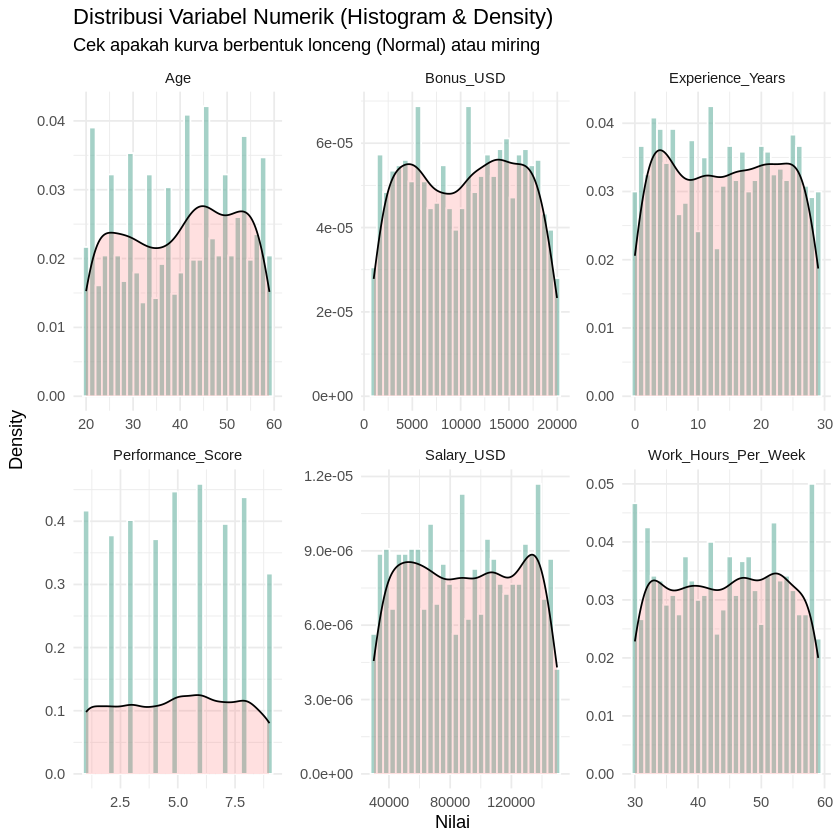

In [ ]:
# Pastikan library terinstall dan termuat
if(!require(moments)) install.packages("moments")
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(tidyr)) install.packages("tidyr") # Untuk pivot_longer
library(moments)
library(ggplot2)
library(tidyr)
library(dplyr)

# 1. Pilih Variabel Numerik
# Kita fokus pada variabel numerik utama
num_vars <- salary_df %>%
  select(Age, Experience_Years, Salary_USD, Bonus_USD, Work_Hours_Per_Week, Performance_Score)

# 2. Hitung Statistik Lengkap (SD, Skewness, Kurtosis)
# Membuat dataframe ringkasan
stats_summary <- data.frame(
  Variable = names(num_vars),
  Mean = sapply(num_vars, mean, na.rm = TRUE),
  Median = sapply(num_vars, median, na.rm = TRUE),
  SD = sapply(num_vars, sd, na.rm = TRUE),         # Standar Deviasi (Variability)
  Skewness = sapply(num_vars, skewness, na.rm = TRUE), # Kemencengan (Shape)
  Kurtosis = sapply(num_vars, kurtosis, na.rm = TRUE)  # Keruncingan (Shape)
)

# Tampilkan Tabel Statistik
cat("\n=== TABEL STATISTIK DESKRIPTIF LENGKAP (SHAPE & VARIABILITY) ===\n")
# Modifikasi: Hanya bulatkan kolom numerik, biarkan kolom 'Variable' tetap
print(cbind(stats_summary[, 1, drop = FALSE], round(stats_summary[, -1], 4)))


# 3. Interpretasi Otomatis Singkat (Bantu baca hasil)
cat("\n--- INTERPRETASI SINGKAT ---\n")
for(i in 1:nrow(stats_summary)) {
  var_name <- stats_summary$Variable[i]
  skew <- stats_summary$Skewness[i]

  shape_desc <- ""
  if (skew > 1) {
    shape_desc <- "Miring Kanan (Positif) - Banyak nilai rendah"
  } else if (skew < -1) {
    shape_desc <- "Miring Kiri (Negatif) - Banyak nilai tinggi"
  } else {
    shape_desc <- "Simetris (Normal) - Sebaran merata"
  }

  cat(sprintf("- %s: Skewness %.2f -> %s\n", var_name, skew, shape_desc))
}


# 4. Visualisasi Histogram & Density Plot (Untuk melihat bentuk kurva)
# Kita ubah data ke format panjang agar bisa di-plot sekaligus (Facet Grid)
num_vars_long <- num_vars %>%
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Value")

plot_distribusi <- ggplot(num_vars_long, aes(x = Value)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "#69b3a2", color = "white", alpha = 0.6) +
  geom_density(alpha = 0.2, fill = "#FF6666") + # Garis kurva densitas
  facet_wrap(~Variable, scales = "free") + # Memisahkan grafik per variabel
  theme_minimal() +
  labs(
    title = "Distribusi Variabel Numerik (Histogram & Density)",
    subtitle = "Cek apakah kurva berbentuk lonceng (Normal) atau miring",
    x = "Nilai",
    y = "Density"
  )

# Tampilkan Plot
print(plot_distribusi)

## UAS SOAL NOMOR 1 PT2

✅ Data Berhasil Dimuat! Jumlah Baris yang ada di database: 1200 

=== 1. ANALISIS CENTRAL TENDENCY & SHAPE (Gaji) ===
Mean (Rata-rata) : USD 89792.31 
Median (Tengah)  : USD 89086 
Skewness (Kemiringan): -0.0011 (Miring Kiri/Negatif) 
Kurtosis (Keruncingan): 1.7501 


=== 2. ANALISIS VARIABILITY & RELATIVE STANDING ===
Standard Deviation : 35323.54 
Range (Min - Max)  : 30028 - 149815 
IQR (Jarak Q1-Q3)  : 62449.5 
Jumlah Outlier (Gaji Ekstrem Tinggi): 0 orang



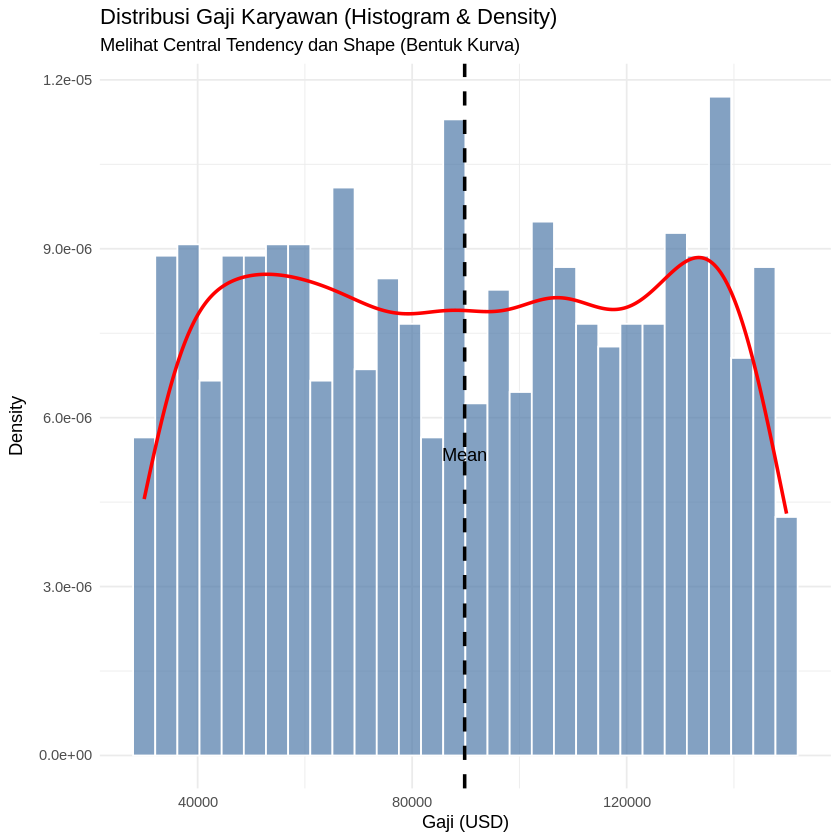


=== 3. ANALISIS ASSOCIATION (HUBUNGAN) ===
[H1] Korelasi Pearson (Pengalaman vs Gaji): -0.0058 (p-value: 0.8413 )


`geom_smooth()` using formula = 'y ~ x'


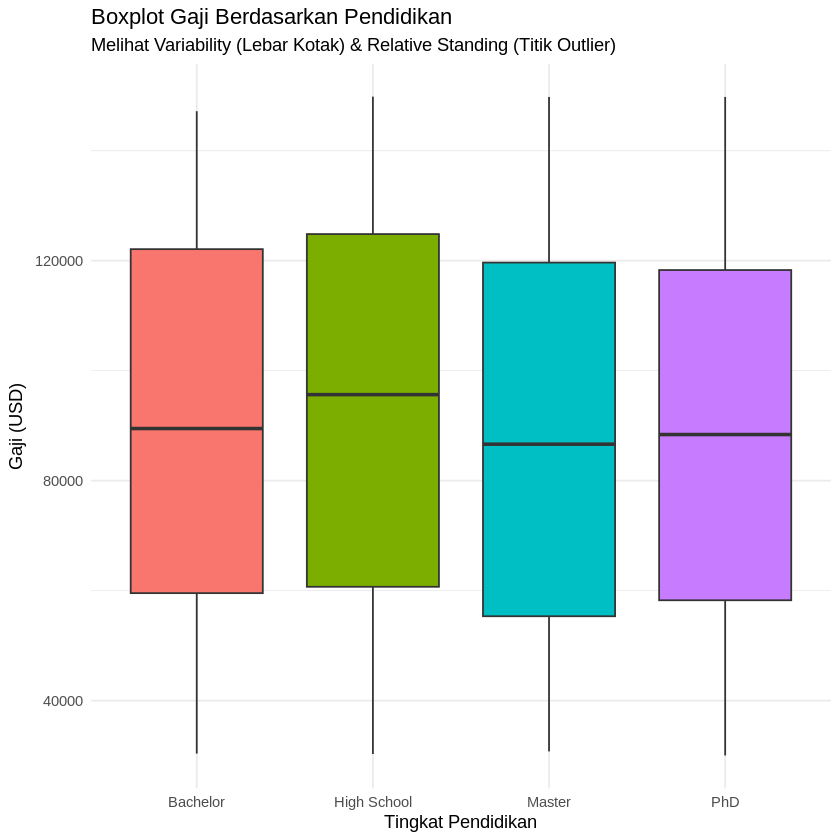


[H2] Chi-Square (Pendidikan vs Kategori Gaji)

	Pearson's Chi-squared test

data:  table_edu
X-squared = 1.8892, df = 3, p-value = 0.5957



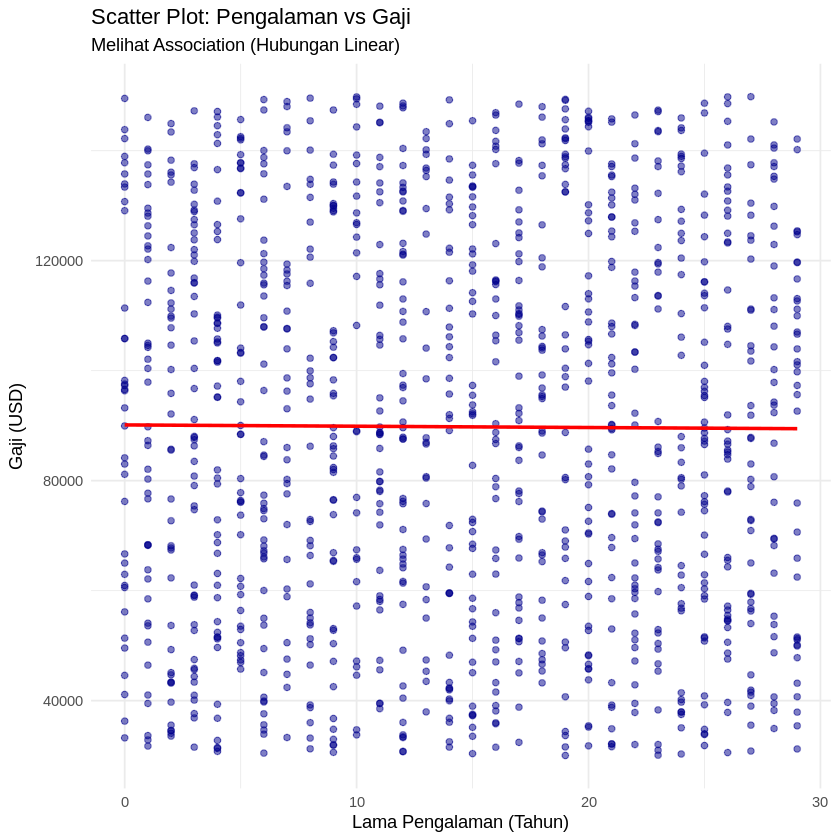

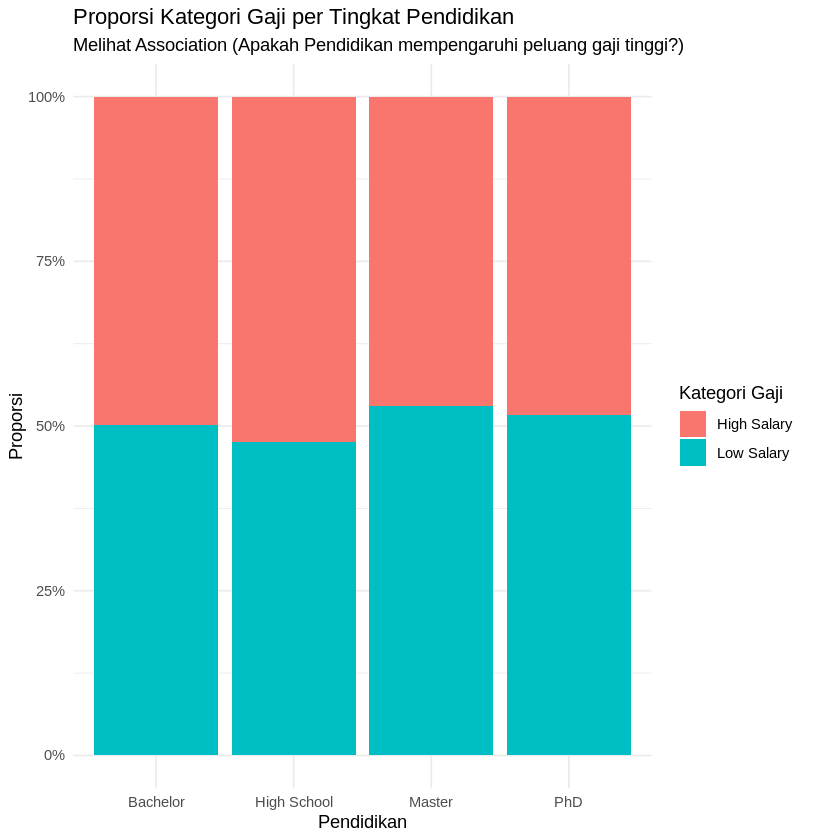

In [ ]:
# ==============================================================================
# BAGIAN 0: PERSIAPAN (SETUP)
# ==============================================================================
# 1. Install & Load Library yang dibutuhkan
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(moments)) install.packages("moments") # Untuk Skewness & Kurtosis
if(!require(dplyr)) install.packages("dplyr")
library(ggplot2)
library(moments)
library(dplyr)

# 2. Load Dataset
df <- read.csv("/content/dataset/Salary_Dataset.csv")

# 3. Pre-processing Sederhana
# Mengubah data teks menjadi faktor (kategori)
df$Education <- as.factor(df$Education)
df$Country <- as.factor(df$Country)
df$Gender <- as.factor(df$Gender)
# Membuat Kategori Gaji (High/Low) untuk analisis asosiasi nanti
mean_salary <- mean(df$Salary_USD)
df$Salary_Category <- ifelse(df$Salary_USD >= mean_salary, "High Salary", "Low Salary")

cat("✅ Data Berhasil Dimuat! Jumlah Baris yang ada di database:", nrow(df), "\n\n")


# ==============================================================================
# BAGIAN 1: CENTRAL TENDENCY (PUSAT) & SHAPE (BENTUK)
# Menjawab: "Seperti apa profil umum gaji karyawan?"
# ==============================================================================
cat("=== 1. ANALISIS CENTRAL TENDENCY & SHAPE (Gaji) ===\n")

# Hitung Statistik
mean_val <- mean(df$Salary_USD)
median_val <- median(df$Salary_USD)
skew_val <- skewness(df$Salary_USD)
kurt_val <- kurtosis(df$Salary_USD)

cat("Mean (Rata-rata) : USD", round(mean_val, 2), "\n")
cat("Median (Tengah)  : USD", round(median_val, 2), "\n")
cat("Skewness (Kemiringan):", round(skew_val, 4),
    ifelse(skew_val > 0, "(Miring Kanan/Positif)", "(Miring Kiri/Negatif)"), "\n")
cat("Kurtosis (Keruncingan):", round(kurt_val, 4), "\n\n")

# --- PLOT 1: HISTOGRAM (Untuk Artikel: Deskripsi Data) ---
plot_shape <- ggplot(df, aes(x = Salary_USD)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "#4e79a7", color = "white", alpha = 0.7) +
  geom_density(color = "red", size = 1) + # Garis lengkung densitas
  geom_vline(aes(xintercept = mean_val), color = "black", linetype = "dashed", size = 1) +
  annotate("text", x = mean_val, y = 0.000005, label = "Mean", vjust = -1) +
  labs(title = "Distribusi Gaji Karyawan (Histogram & Density)",
       subtitle = "Melihat Central Tendency dan Shape (Bentuk Kurva)",
       x = "Gaji (USD)", y = "Density") +
  theme_minimal()

print(plot_shape)


# ==============================================================================
# BAGIAN 2: VARIABILITY (SEBARAN) & RELATIVE STANDING (POSISI)
# Menjawab: "Seberapa timpang gajinya? Ada yang aneh (outlier)?"
# ==============================================================================
cat("\n=== 2. ANALISIS VARIABILITY & RELATIVE STANDING ===\n")

# Hitung Statistik
sd_val <- sd(df$Salary_USD)
min_val <- min(df$Salary_USD)
max_val <- max(df$Salary_USD)
quartiles <- quantile(df$Salary_USD, probs = c(0.25, 0.75))
iqr_val <- IQR(df$Salary_USD)

cat("Standard Deviation :", round(sd_val, 2), "\n")
cat("Range (Min - Max)  :", min_val, "-", max_val, "\n")
cat("IQR (Jarak Q1-Q3)  :", iqr_val, "\n")

# Cek Outlier (Rumus: Q3 + 1.5*IQR atau Q1 - 1.5*IQR)
upper_bound <- quartiles[2] + 1.5 * iqr_val
outliers <- df[df$Salary_USD > upper_bound, ]
cat("Jumlah Outlier (Gaji Ekstrem Tinggi):", nrow(outliers), "orang\n\n")

# --- PLOT 2: BOXPLOT (Untuk Artikel: Deteksi Outlier) ---
plot_var <- ggplot(df, aes(x = Education, y = Salary_USD, fill = Education)) +
  geom_boxplot() +
  labs(title = "Boxplot Gaji Berdasarkan Pendidikan",
       subtitle = "Melihat Variability (Lebar Kotak) & Relative Standing (Titik Outlier)",
       x = "Tingkat Pendidikan", y = "Gaji (USD)") +
  theme_minimal() +
  theme(legend.position = "none")

print(plot_var)


# ==============================================================================
# BAGIAN 3: ASSOCIATION (HUBUNGAN ANTAR VARIABEL)
# Menjawab Hipotesis 1 & 2
# ==============================================================================
cat("\n=== 3. ANALISIS ASSOCIATION (HUBUNGAN) ===\n")

# --- A. HUBUNGAN NUMERIK (Pengalaman vs Gaji) ---
# Menggunakan Korelasi Pearson (Sesuai PDF Topic 9)
cor_test <- cor.test(df$Experience_Years, df$Salary_USD)
cat("[H1] Korelasi Pearson (Pengalaman vs Gaji):", round(cor_test$estimate, 4),
    "(p-value:", round(cor_test$p.value, 4), ")\n")

# --- PLOT 3: SCATTER PLOT (Untuk Artikel: Hipotesis 1) ---
plot_assoc_num <- ggplot(df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "darkblue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) + # Garis Regresi
  labs(title = "Scatter Plot: Pengalaman vs Gaji",
       subtitle = "Melihat Association (Hubungan Linear)",
       x = "Lama Pengalaman (Tahun)", y = "Gaji (USD)") +
  theme_minimal()

print(plot_assoc_num)


# --- B. HUBUNGAN KATEGORIK (Pendidikan vs Kategori Gaji) ---
# Menggunakan Chi-Square (Sesuai PDF Topic 11)
table_edu <- table(df$Education, df$Salary_Category)
chi_test <- chisq.test(table_edu)
cat("\n[H2] Chi-Square (Pendidikan vs Kategori Gaji)\n")
print(chi_test)

# --- PLOT 4: STACKED BAR CHART (Untuk Artikel: Hipotesis 2) ---
plot_assoc_cat <- ggplot(df, aes(x = Education, fill = Salary_Category)) +
  geom_bar(position = "fill") + # "fill" membuat grafik jadi persentase (0-100%)
  labs(title = "Proporsi Kategori Gaji per Tingkat Pendidikan",
       subtitle = "Melihat Association (Apakah Pendidikan mempengaruhi peluang gaji tinggi?)",
       x = "Pendidikan", y = "Proporsi", fill = "Kategori Gaji") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal()

print(plot_assoc_cat)

In [ ]:
# ==============================================================================
# BAGIAN 0: PERSIAPAN (SETUP)
# ==============================================================================
# 1. Install & Load Library yang dibutuhkan
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(moments)) install.packages("moments") # Untuk Skewness & Kurtosis
if(!require(dplyr)) install.packages("dplyr")
library(ggplot2)
library(moments)
library(dplyr)

# 2. Load Dataset
df <- read.csv("Salary_Dataset.csv")
salary_df <- read.csv('/content/dataset/Salary_Dataset.csv')

# 3. Pre-processing Sederhana
# Mengubah data teks menjadi faktor (kategori)
salary_df$Education <- as.factor(salary_df$Education)
salary_df$Country <- as.factor(salary_df$Country)
salary_df$Gender <- as.factor(salary_df$Gender)
# Membuat Kategori Gaji (High/Low) untuk analisis asosiasi nanti
mean_salary <- mean(salary_df$Salary_USD)
salary_df$Salary_Category <- ifelse(salary_df$Salary_USD >= mean_salary, "High Salary", "Low Salary")

cat("✅ Data Berhasil Dimuat! Jumlah Baris:", nrow(salary_df), "\n\n")


# ==============================================================================
# BAGIAN 1: CENTRAL TENDENCY (PUSAT) & SHAPE (BENTUK)
# Menjawab: "Seperti apa profil umum gaji karyawan?"
# ==============================================================================
cat("=== 1. ANALISIS CENTRAL TENDENCY & SHAPE (Gaji) ===\n")

# Hitung Statistik
mean_val <- mean(df$Salary_USD)
median_val <- median(df$Salary_USD)
skew_val <- skewness(df$Salary_USD)
kurt_val <- kurtosis(df$Salary_USD)

cat("Mean (Rata-rata) : USD", round(mean_val, 2), "\n")
cat("Median (Tengah)  : USD", round(median_val, 2), "\n")
cat("Skewness (Kemiringan):", round(skew_val, 4),
    ifelse(skew_val > 0, "(Miring Kanan/Positif)", "(Miring Kiri/Negatif)"), "\n")
cat("Kurtosis (Keruncingan):", round(kurt_val, 4), "\n\n")

# --- PLOT 1: HISTOGRAM (Untuk Artikel: Deskripsi Data) ---
plot_shape <- ggplot(df, aes(x = Salary_USD)) +
  geom_histogram(aes(y = ..density..), bins = 30, fill = "#4e79a7", color = "white", alpha = 0.7) +
  geom_density(color = "red", size = 1) + # Garis lengkung densitas
  geom_vline(aes(xintercept = mean_val), color = "black", linetype = "dashed", size = 1) +
  annotate("text", x = mean_val, y = 0.000005, label = "Mean", vjust = -1) +
  labs(title = "Distribusi Gaji Karyawan (Histogram & Density)",
       subtitle = "Melihat Central Tendency dan Shape (Bentuk Kurva)",
       x = "Gaji (USD)", y = "Density") +
  theme_minimal()

print(plot_shape)


# ==============================================================================
# BAGIAN 2: VARIABILITY (SEBARAN) & RELATIVE STANDING (POSISI)
# Menjawab: "Seberapa timpang gajinya? Ada yang aneh (outlier)?"
# ==============================================================================
cat("\n=== 2. ANALISIS VARIABILITY & RELATIVE STANDING ===\n")

# Hitung Statistik
sd_val <- sd(df$Salary_USD)
min_val <- min(df$Salary_USD)
max_val <- max(df$Salary_USD)
quartiles <- quantile(df$Salary_USD, probs = c(0.25, 0.75))
iqr_val <- IQR(df$Salary_USD)

cat("Standard Deviation :", round(sd_val, 2), "\n")
cat("Range (Min - Max)  :", min_val, "-", max_val, "\n")
cat("IQR (Jarak Q1-Q3)  :", iqr_val, "\n")

# Cek Outlier (Rumus: Q3 + 1.5*IQR atau Q1 - 1.5*IQR)
upper_bound <- quartiles[2] + 1.5 * iqr_val
outliers <- df[df$Salary_USD > upper_bound, ]
cat("Jumlah Outlier (Gaji Ekstrem Tinggi):", nrow(outliers), "orang\n\n")

# --- PLOT 2: BOXPLOT (Untuk Artikel: Deteksi Outlier) ---
plot_var <- ggplot(df, aes(x = Education, y = Salary_USD, fill = Education)) +
  geom_boxplot() +
  labs(title = "Boxplot Gaji Berdasarkan Pendidikan",
       subtitle = "Melihat Variability (Lebar Kotak) & Relative Standing (Titik Outlier)",
       x = "Tingkat Pendidikan", y = "Gaji (USD)") +
  theme_minimal() +
  theme(legend.position = "none")

print(plot_var)


# ==============================================================================
# BAGIAN 3: ASSOCIATION (HUBUNGAN ANTAR VARIABEL)
# Menjawab Hipotesis 1 & 2
# ==============================================================================
cat("\n=== 3. ANALISIS ASSOCIATION (HUBUNGAN) ===\n")

# --- A. HUBUNGAN NUMERIK (Pengalaman vs Gaji) ---
# Menggunakan Korelasi Pearson (Sesuai PDF Topic 9)
cor_test <- cor.test(df$Experience_Years, df$Salary_USD)
cat("[H1] Korelasi Pearson (Pengalaman vs Gaji):", round(cor_test$estimate, 4),
    "(p-value:", round(cor_test$p.value, 4), ")\n")

# --- PLOT 3: SCATTER PLOT (Untuk Artikel: Hipotesis 1) ---
plot_assoc_num <- ggplot(df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "darkblue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) + # Garis Regresi
  labs(title = "Scatter Plot: Pengalaman vs Gaji",
       subtitle = "Melihat Association (Hubungan Linear)",
       x = "Lama Pengalaman (Tahun)", y = "Gaji (USD)") +
  theme_minimal()

print(plot_assoc_num)


# --- B. HUBUNGAN KATEGORIK (Pendidikan vs Kategori Gaji) ---
# Menggunakan Chi-Square (Sesuai PDF Topic 11)
table_edu <- table(df$Education, df$Salary_Category)
chi_test <- chisq.test(table_edu)
cat("\n[H2] Chi-Square (Pendidikan vs Kategori Gaji)\n")
print(chi_test)

# --- PLOT 4: STACKED BAR CHART (Untuk Artikel: Hipotesis 2) ---
plot_assoc_cat <- ggplot(df, aes(x = Education, fill = Salary_Category)) +
  geom_bar(position = "fill") + # "fill" membuat grafik jadi persentase (0-100%)
  labs(title = "Proporsi Kategori Gaji per Tingkat Pendidikan",
       subtitle = "Melihat Association (Apakah Pendidikan mempengaruhi peluang gaji tinggi?)",
       x = "Pendidikan", y = "Proporsi", fill = "Kategori Gaji") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal()

print(plot_assoc_cat)

Warning message in file(file, "rt"):
“cannot open file 'Salary_Dataset.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


# ARTIKEL BAB 4 ANALISIS DAN PEMBAHASAN
SECTION INI ITU RECAP BUAT DIPAKE DI LAPORAN,, JADI BIAR GA MABOK AJA


## BAB 4.1 HIPOTESIS 1

`geom_smooth()` using formula = 'y ~ x'



=== HASIL UJI KORELASI PEARSON ===

	Pearson's product-moment correlation

data:  salary_df$Experience_Years and salary_df$Salary_USD
t = -0.2003, df = 1198, p-value = 0.8413
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.06235601  0.05081945
sample estimates:
         cor 
-0.005786815 

>> Status: TIDAK SIGNIFIKAN (H0 Diterima).
   Artinya: Tidak ada bukti statistik bahwa pengalaman mempengaruhi gaji.

=== HASIL MODEL LINEAR REGRESSION ===

Call:
lm(formula = Salary_USD ~ Experience_Years, data = salary_df)

Residuals:
   Min     1Q Median     3Q    Max 
-59655 -31063   -683  31350  60320 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      90130.29    1971.77   45.71   <2e-16 ***
Experience_Years   -23.55     117.56   -0.20    0.841    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35340 on 1198 degrees of freedom
Multiple R-squared:  3.349e-05,	Adjus

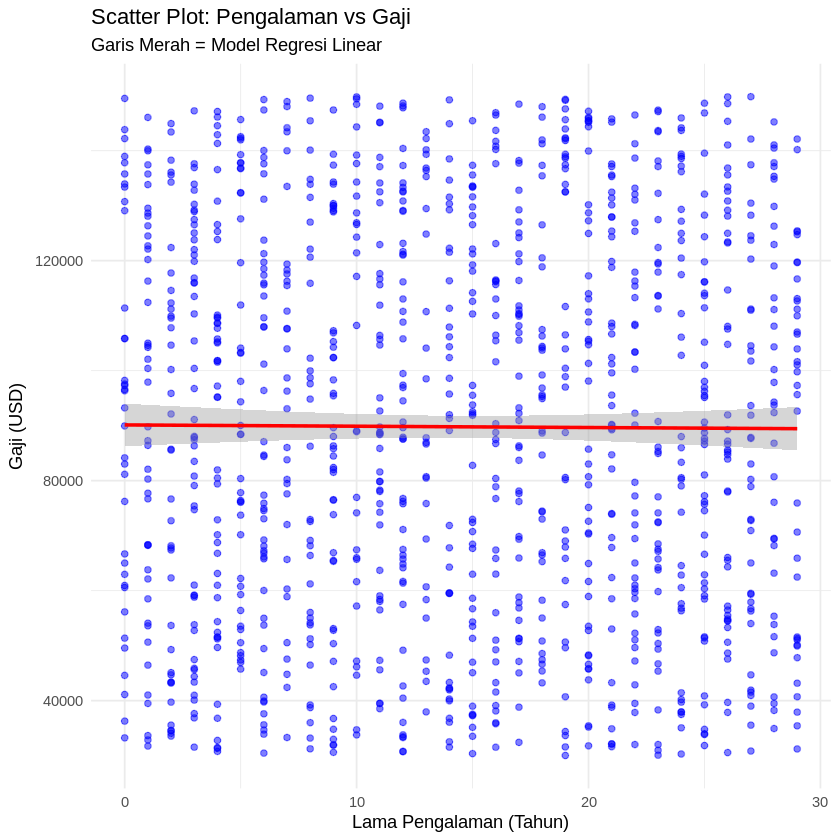

In [ ]:
# Plotting Data: Titik-titik (Scatter) dan Garis Regresi (Line)
ggplot(salary_df, aes(x = Experience_Years, y = Salary_USD)) +
  geom_point(alpha = 0.5, color = "blue") +      # Titik data (transparan biar kelihatan numpuk)
  geom_smooth(method = "lm", color = "red") +    # Garis Regresi Linear
  labs(
    title = "Scatter Plot: Pengalaman vs Gaji",
    subtitle = "Garis Merah = Model Regresi Linear",
    x = "Lama Pengalaman (Tahun)",
    y = "Gaji (USD)"
  ) +
  theme_minimal()

# 2. UJI KORELASI PEARSON (Untuk melihat Arah & Signifikansi)
# ------------------------------------------------------------------------------
cat("\n=== HASIL UJI KORELASI PEARSON ===\n")
uji_korelasi <- cor.test(salary_df$Experience_Years, salary_df$Salary_USD, method = "pearson")
print(uji_korelasi)

# Interpretasi Korelasi
if(uji_korelasi$p.value < 0.05) {
  cat(">> Status: SIGNIFIKAN.\n")
} else {
  cat(">> Status: TIDAK SIGNIFIKAN (H0 Diterima).\n")
  cat("   Artinya: Tidak ada bukti statistik bahwa pengalaman mempengaruhi gaji.\n")
}


# 3. MODEL LINEAR REGRESSION  (Untuk melihat Kekuatan Pengaruh / R-Squared)
# ------------------------------------------------------------------------------
cat("\n=== HASIL MODEL LINEAR REGRESSION ===\n")
model_regresi <- lm(Salary_USD ~ Experience_Years, data = salary_df)
summary_model <- summary(model_regresi)
print(summary_model)

# Ambil nilai R-Squared
r_squared <- summary_model$r.squared
cat("\n>> Koefisien Determinasi (R-Squared):", round(r_squared * 100, 4), "%\n")
cat("   Artinya: Variabel Pengalaman hanya mampu menjelaskan", round(r_squared * 100, 4),
    "% dari total variasi gaji.\n")
cat("   (Sisanya dijelaskan oleh faktor lain yang tidak kita teliti dalam hipotesis ini).\n")


# 4. DIAGNOSIS RESIDUAL (Untuk Deteksi Outlier Ekstrem)
# ------------------------------------------------------------------------------
# Jika Topic 9 membahas Residual Analysis, kita cek sedikit:
# Residual = Gaji Asli - Gaji Prediksi
residual <- residuals(model_regresi)
cat("\n=== CEK RESIDUAL EKSTREM (OUTLIER) ===\n")
cat("Residual Terbesar (Gaji jauh di atas prediksi): USD", max(residual), "\n")
cat("Residual Terkecil (Gaji jauh di bawah prediksi): USD", min(residual), "\n")

## BAB 4.2 HIPOTESIS 2

=== INFO PRE-PROCESSING ===
Threshold (Batas) Gaji Tinggi : USD 89792.31 
Jumlah Karyawan High Salary   : 591 
Jumlah Karyawan Low Salary    : 609 


=== HASIL UJI CHI-SQUARE===
             
              High Salary Low Salary
  High School         145        132
  Bachelor            146        147
  Master              145        164
  PhD                 155        166

	Pearson's Chi-squared test

data:  tabel_kontingensi
X-squared = 1.8892, df = 3, p-value = 0.5957


--- KESIMPULAN HIPOTESIS 2 ---
>> Status: TIDAK SIGNIFIKAN (H0 Diterima).
   Artinya: Pendidikan dan Kategori Gaji bersifat INDEPENDEN (Saling Bebas).
   (Mau lulusan SMA atau PhD, peluang dapat gaji tingginya sama saja).


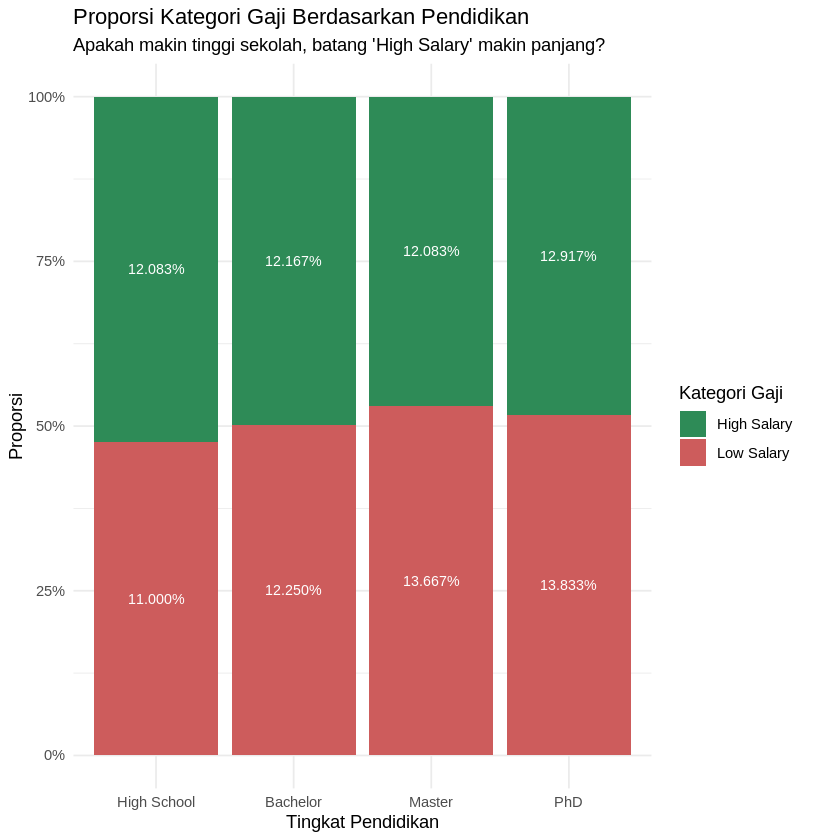

In [ ]:
# ==============================================================================
# KODE PERTANYAAN 2: Hubungan Pendidikan (Kategori) vs Gaji (Kategori)
# ==============================================================================

# 1. PERSIAPAN DATA (Penting: Membuat Kategori Gaji)
# ------------------------------------------------------------------------------
library(ggplot2)

# Load data (jika belum ada)
if(!exists("df")) {
  df <- read.csv("Salary_Dataset.csv")
}

# Pastikan urutan pendidikan logis (Ordinal) agar grafik rapi
# Kita urutkan: High School -> Bachelor -> Master -> PhD
df$Education <- factor(df$Education,
                       levels = c("High School", "Bachelor", "Master", "PhD"))

# Membuat Variabel Baru: "Salary_Category"
# - High Salary: Gaji di atas atau sama dengan rata-rata
# - Low Salary: Gaji di bawah rata-rata
rata_rata_gaji <- mean(df$Salary_USD, na.rm = TRUE)
df$Salary_Category <- ifelse(df$Salary_USD >= rata_rata_gaji, "High Salary", "Low Salary")

cat("=== INFO PRE-PROCESSING ===\n")
cat("Threshold (Batas) Gaji Tinggi : USD", round(rata_rata_gaji, 2), "\n")
cat("Jumlah Karyawan High Salary   :", sum(df$Salary_Category == "High Salary"), "\n")
cat("Jumlah Karyawan Low Salary    :", sum(df$Salary_Category == "Low Salary"), "\n\n")


# 2. VISUALISASI: STACKED BAR CHART (Proporsi)
# ------------------------------------------------------------------------------
# Grafik ini menunjukkan persentase High/Low Salary di tiap jenjang pendidikan
plot_h2 <- ggplot(df, aes(x = Education, fill = Salary_Category)) +
  geom_bar(position = "fill") +  # "fill" membuat bar menjadi proporsi (0-100%)
  geom_text(aes(label = scales::percent(..count../sum(..count..))),
            stat = "count", position = position_fill(vjust = 0.5), size = 3, color="white") +
  labs(
    title = "Proporsi Kategori Gaji Berdasarkan Pendidikan",
    subtitle = "Apakah makin tinggi sekolah, batang 'High Salary' makin panjang?",
    x = "Tingkat Pendidikan",
    y = "Proporsi",
    fill = "Kategori Gaji"
  ) +
  scale_y_continuous(labels = scales::percent) + # Ubah sumbu Y jadi persen
  theme_minimal() +
  scale_fill_manual(values = c("High Salary" = "#2E8B57", "Low Salary" = "#CD5C5C"))

print(plot_h2)


# 3. UJI STATISTIK: CHI-SQUARE TEST OF INDEPENDENCE
# ------------------------------------------------------------------------------
cat("\n=== HASIL UJI CHI-SQUARE===\n")

# Membuat Tabel Kontingensi (Silang)
tabel_kontingensi <- table(df$Education, df$Salary_Category)
print(tabel_kontingensi)

# Melakukan Uji Chi-Square
uji_chi <- chisq.test(tabel_kontingensi)
print(uji_chi)

# 4. INTERPRETASI OTOMATIS
# ------------------------------------------------------------------------------
cat("\n--- KESIMPULAN HIPOTESIS 2 ---\n")
if(uji_chi$p.value < 0.05) {
  cat(">> Status: SIGNIFIKAN (Tolak H0).\n")
  cat("   Artinya: Terdapat hubungan/asosiasi nyata antara Pendidikan dan Peluang Gaji.\n")
  cat("   (Pendidikan mempengaruhi apakah gaji seseorang tinggi atau rendah).\n")
} else {
  cat(">> Status: TIDAK SIGNIFIKAN (H0 Diterima).\n")
  cat("   Artinya: Pendidikan dan Kategori Gaji bersifat INDEPENDEN (Saling Bebas).\n")
  cat("   (Mau lulusan SMA atau PhD, peluang dapat gaji tingginya sama saja).\n")
}

## BAB 4.3 HIPOTESIS 3

=== STATISTIK DESKRIPTIF (GENDER) ===
# A tibble: 2 × 4
  Gender Count Mean_Salary SD_Salary
  <fct>  <int>       <dbl>     <dbl>
1 Female   596      88636.    35910.
2 Male     604      90933.    34728.


=== HASIL UJI T-TEST ===

	Welch Two Sample t-test

data:  Salary_USD by Gender
t = -1.1261, df = 1195.4, p-value = 0.2603
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -6298.662  1704.832
sample estimates:
mean in group Female   mean in group Male 
            88636.19             90933.11 


--- KESIMPULAN HIPOTESIS 3 ---
>> Status: TIDAK SIGNIFIKAN (H0 Diterima).
   Artinya: Tidak ada bukti statistik perbedaan gaji antar gender.
   (Gaji Pria dan Wanita dalam dataset di gaji ini setara secara rata-rata).


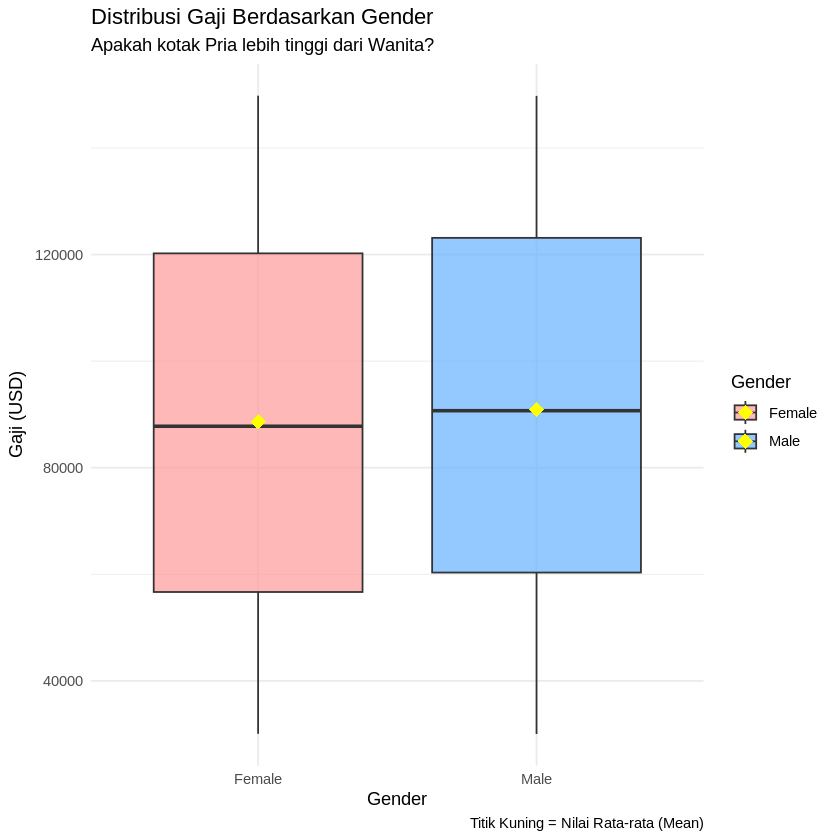

In [28]:
# ==============================================================================
# KODE HIPOTESIS 3: Disparitas Gaji Berbasis Gender
# Referensi Metode: PDF Topic 8 (Inferensi Rata-Rata Dua Populasi - T-Test)
# ==============================================================================

library(ggplot2)
library(dplyr)

# 1. PERSIAPAN DATA
# Pastikan data sudah dimuat
if(!exists("df")) {
  df <- read.csv("Salary_Dataset.csv")
}

# Cek Rata-rata Gaji per Gender
stats_gender <- df %>%
  group_by(Gender) %>%
  summarise(
    Count = n(),
    Mean_Salary = mean(Salary_USD, na.rm = TRUE),
    SD_Salary = sd(Salary_USD, na.rm = TRUE)
  )

cat("=== STATISTIK DESKRIPTIF (GENDER) ===\n")
print(stats_gender)
cat("\n")


# 2. VISUALISASI: BOXPLOT PERBANDINGAN
# Untuk melihat sebaran dan median gaji Pria vs Wanita
plot_h3 <- ggplot(df, aes(x = Gender, y = Salary_USD, fill = Gender)) +
  geom_boxplot(alpha = 0.7) +
  stat_summary(fun = mean, geom = "point", shape = 18, size = 4, color = "yellow") + # Titik Kuning = Rata-rata
  labs(
    title = "Distribusi Gaji Berdasarkan Gender",
    subtitle = "Apakah kotak Pria lebih tinggi dari Wanita?",
    x = "Gender",
    y = "Gaji (USD)",
    caption = "Titik Kuning = Nilai Rata-rata (Mean)"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("Female" = "#FF9999", "Male" = "#66B2FF"))

print(plot_h3)


# 3. UJI STATISTIK: INDEPENDENT SAMPLE T-TEST
# Menguji H0: Rata-rata Gaji Pria = Rata-rata Gaji Wanita
# Menggunakan Welch Two Sample t-test (Aman jika varians tidak sama)
cat("\n=== HASIL UJI T-TEST ===\n")

t_test_result <- t.test(Salary_USD ~ Gender, data = df, alternative = "two.sided")
print(t_test_result)


# 4. INTERPRETASI OTOMATIS
cat("\n--- KESIMPULAN HIPOTESIS 3 ---\n")
if(t_test_result$p.value < 0.05) {
  cat(">> Status: SIGNIFIKAN (Tolak H0).\n")
  cat("   Artinya: Terdapat perbedaan gaji yang nyata antara Pria dan Wanita (Gender Gap Terbukti).\n")
} else {
  cat(">> Status: TIDAK SIGNIFIKAN (H0 Diterima).\n")
  cat("   Artinya: Tidak ada bukti statistik perbedaan gaji antar gender.\n")
  cat("   (Gaji Pria dan Wanita dalam dataset di gaji ini setara secara rata-rata).\n")
}

## BAB 4.4 HIPOTESIS 4


=== HASIL UJI CHI-SQUARE===
          
           High Salary Low Salary
  Canada           123        111
  India            131        135
  Pakistan         120        127
  UK               101        115
  USA              116        121

	Pearson's Chi-squared test

data:  tabel_negara
X-squared = 1.6172, df = 4, p-value = 0.8057


--- KESIMPULAN HIPOTESIS 4 ---
>> Status: TIDAK SIGNIFIKAN (H0 Diterima).
   Artinya: Lokasi negara TIDAK MEMPENGARUHI peluang gaji.
   (ANOMALI: Gaji di India/Pakistan setara dengan USA/UK dalam data ini).


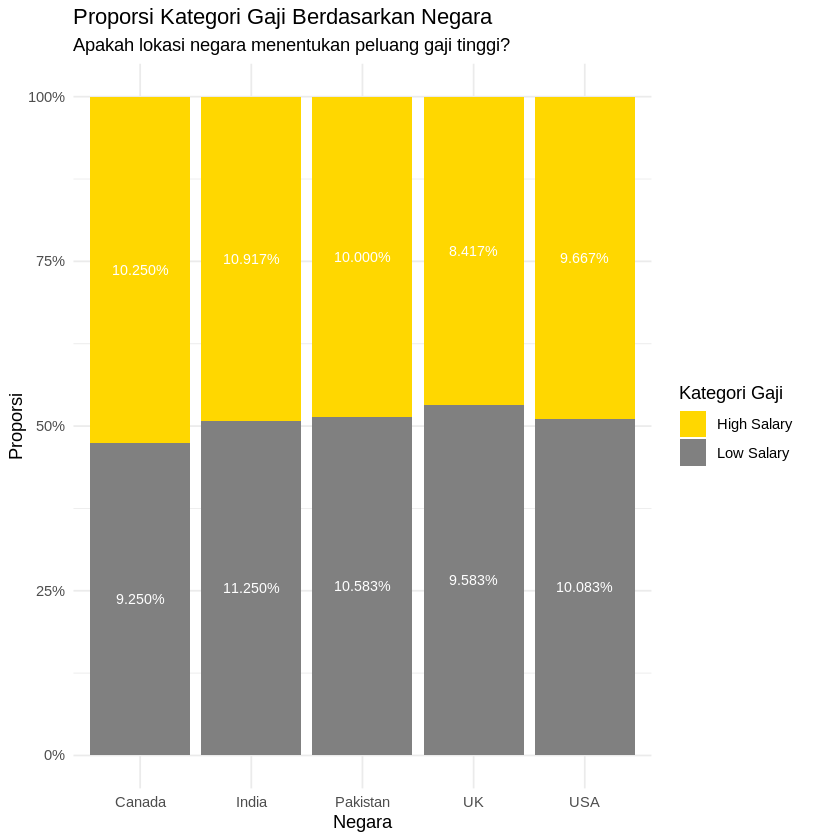

In [25]:
# ==============================================================================
# KODE HIPOTESIS 4: Pengaruh Negara terhadap Kategori Gaji
# ==============================================================================

library(ggplot2)

# 1. PERSIAPAN DATA
if(!exists("df")) {
  df <- read.csv("Salary_Dataset.csv")
}

# Membuat Kategori Gaji (High/Low) jika belum ada
rata_rata_gaji <- mean(df$Salary_USD, na.rm = TRUE)
df$Salary_Category <- ifelse(df$Salary_USD >= rata_rata_gaji, "High Salary", "Low Salary")
df$Country <- as.factor(df$Country) # Pastikan Negara jadi faktor

# 2. VISUALISASI: STACKED BAR CHART (Proporsi per Negara)
# Kita ingin melihat: Apakah di USA batang "High Salary" lebih panjang dari India?
plot_h4 <- ggplot(df, aes(x = Country, fill = Salary_Category)) +
  geom_bar(position = "fill") + # "fill" = Proporsi 100%
  geom_text(aes(label = scales::percent(..count../sum(..count..))),
            stat = "count", position = position_fill(vjust = 0.5), size = 3, color="white") +
  labs(
    title = "Proporsi Kategori Gaji Berdasarkan Negara",
    subtitle = "Apakah lokasi negara menentukan peluang gaji tinggi?",
    x = "Negara",
    y = "Proporsi",
    fill = "Kategori Gaji"
  ) +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal() +
  scale_fill_manual(values = c("High Salary" = "#FFD700", "Low Salary" = "#808080")) # Emas & Abu

print(plot_h4)


# 3. UJI STATISTIK: CHI-SQUARE TEST OF INDEPENDENCE
# H0: Negara dan Kategori Gaji Saling Bebas (Gaji di mana-mana sama peluangnya)
cat("\n=== HASIL UJI CHI-SQUARE===\n")

tabel_negara <- table(df$Country, df$Salary_Category)
print(tabel_negara)

uji_chi_negara <- chisq.test(tabel_negara)
print(uji_chi_negara)


# 4. INTERPRETASI OTOMATIS
cat("\n--- KESIMPULAN HIPOTESIS 4 ---\n")
if(uji_chi_negara$p.value < 0.05) {
  cat(">> Status: SIGNIFIKAN (Tolak H0).\n")
  cat("   Artinya: Lokasi negara SANGAT MENENTUKAN besaran gaji.\n")
  cat("   (Sesuai teori umum: Gaji negara maju > negara berkembang).\n")
} else {
  cat(">> Status: TIDAK SIGNIFIKAN (H0 Diterima).\n")
  cat("   Artinya: Lokasi negara TIDAK MEMPENGARUHI peluang gaji.\n")
  cat("   (ANOMALI: Gaji di India/Pakistan setara dengan USA/UK dalam data ini).\n")
}

#